In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split



In [2]:
# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
economic_indicators_df = pd.read_csv("EconomicIndicators.csv")



In [3]:
# Data Exploration
print("Train Data:")
print(train_df.head())
print(train_df.info())
print(train_df.isnull().sum())
print("Summary Statistics of Numerical Columns in Train Data:")
print(train_df.describe())



Train Data:
   ID Company Quarter  QuickRatio  InventoryRatio  RevenueGrowth  \
0   0   CMP01      Q1        2.02            7.71           0.05   
1   1   CMP01      Q2        2.01            4.10           0.03   
2   2   CMP01      Q3        2.02            6.79           0.06   
3   3   CMP01      Q4        1.98            3.97           0.01   
4   4   CMP01      Q5        1.96            7.41          -0.07   

   MarketshareChange Bond rating Stock rating Region           Industry  \
0              -0.04         CCC          Buy  South  Metal Fabrication   
1               0.00         CCC         Hold  South  Metal Fabrication   
2              -0.02         CCC          Buy  South  Metal Fabrication   
3               0.02         CCC          Buy  South  Metal Fabrication   
4               0.02         CCC          Buy  South  Metal Fabrication   

    Sales  
0  1517.0  
1  2968.0  
2  1497.0  
3  2929.0  
4  1452.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 en

In [4]:
print("\nTest Data:")
print(test_df.head())
print(test_df.info())
print(test_df.isnull().sum())
print("Summary Statistics of Numerical Columns in Test Data:")
print(test_df.describe())




Test Data:
   ID Company Quarter  QuickRatio  InventoryRatio  RevenueGrowth  \
0   7   CMP01      Q8        1.93            2.79          -0.03   
1   8   CMP01      Q9        1.93            4.77           0.00   
2  16   CMP02      Q8        1.97            2.34           0.04   
3  17   CMP02      Q9        1.93            4.14           0.04   
4  25   CMP03      Q8        0.67             NaN          -0.05   

   MarketshareChange Bond rating Stock rating Region           Industry  
0              -0.01         CCC          Buy  South  Metal Fabrication  
1               0.00         CCC          Buy  South  Metal Fabrication  
2              -0.03           A         Sell   West     Infrastructure  
3               0.01         BBB         Hold   West     Infrastructure  
4              -0.01          BB          Buy   East     Infrastructure  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column             Non-Nu

In [5]:
print("\nEconomic Indicators Data:")
print(economic_indicators_df.head())
print(economic_indicators_df.info())
print(economic_indicators_df.isnull().sum())
print("Summary Statistics of Numerical Columns in Economic Indicators Data:")
print(economic_indicators_df.describe())




Economic Indicators Data:
   Month  Consumer Sentiment  Interest Rate   PMI  Money Supply  NationalEAI  \
0      1                67.2       1.538500  55.5       20847.8    57.083078   
1      2                62.8       1.811579  57.3       20964.3    47.496553   
2      3                59.4       2.109130  58.8       21115.6    41.697385   
3      4                65.2       2.777500  59.2       21315.8    48.503429   
4      5                58.4       2.874286  57.0       21549.3    41.535949   

     EastEAI    WestEAI   SouthEAI   NorthEAI  
0  56.512247  54.628506  56.512247  57.083078  
1  45.454201  47.021588  45.454201  47.496553  
2  39.904398  42.656425  41.280411  41.697385  
3  46.417782  46.417782  48.018395  43.653086  
4  38.379217  39.749903  42.491276  49.843138  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


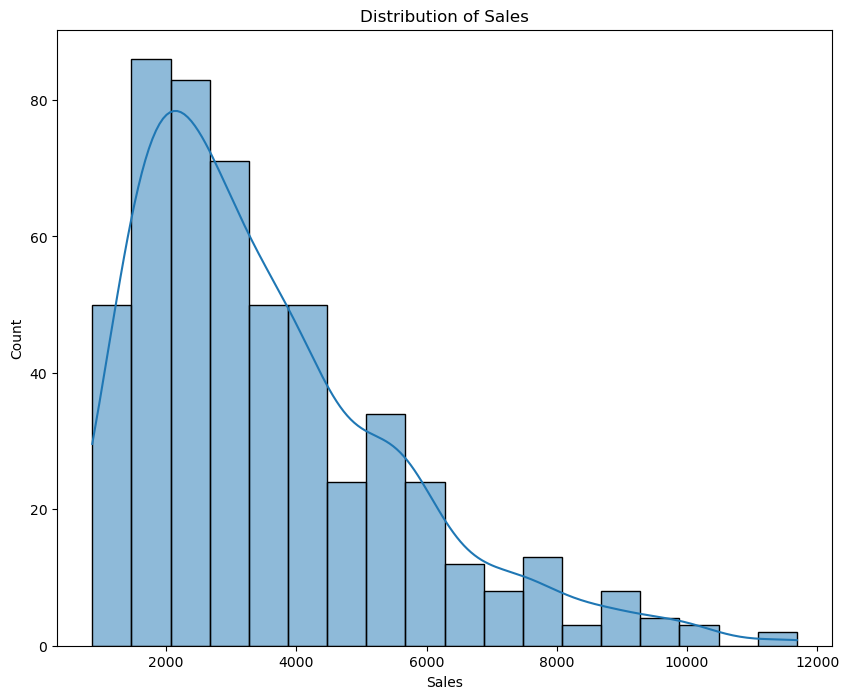

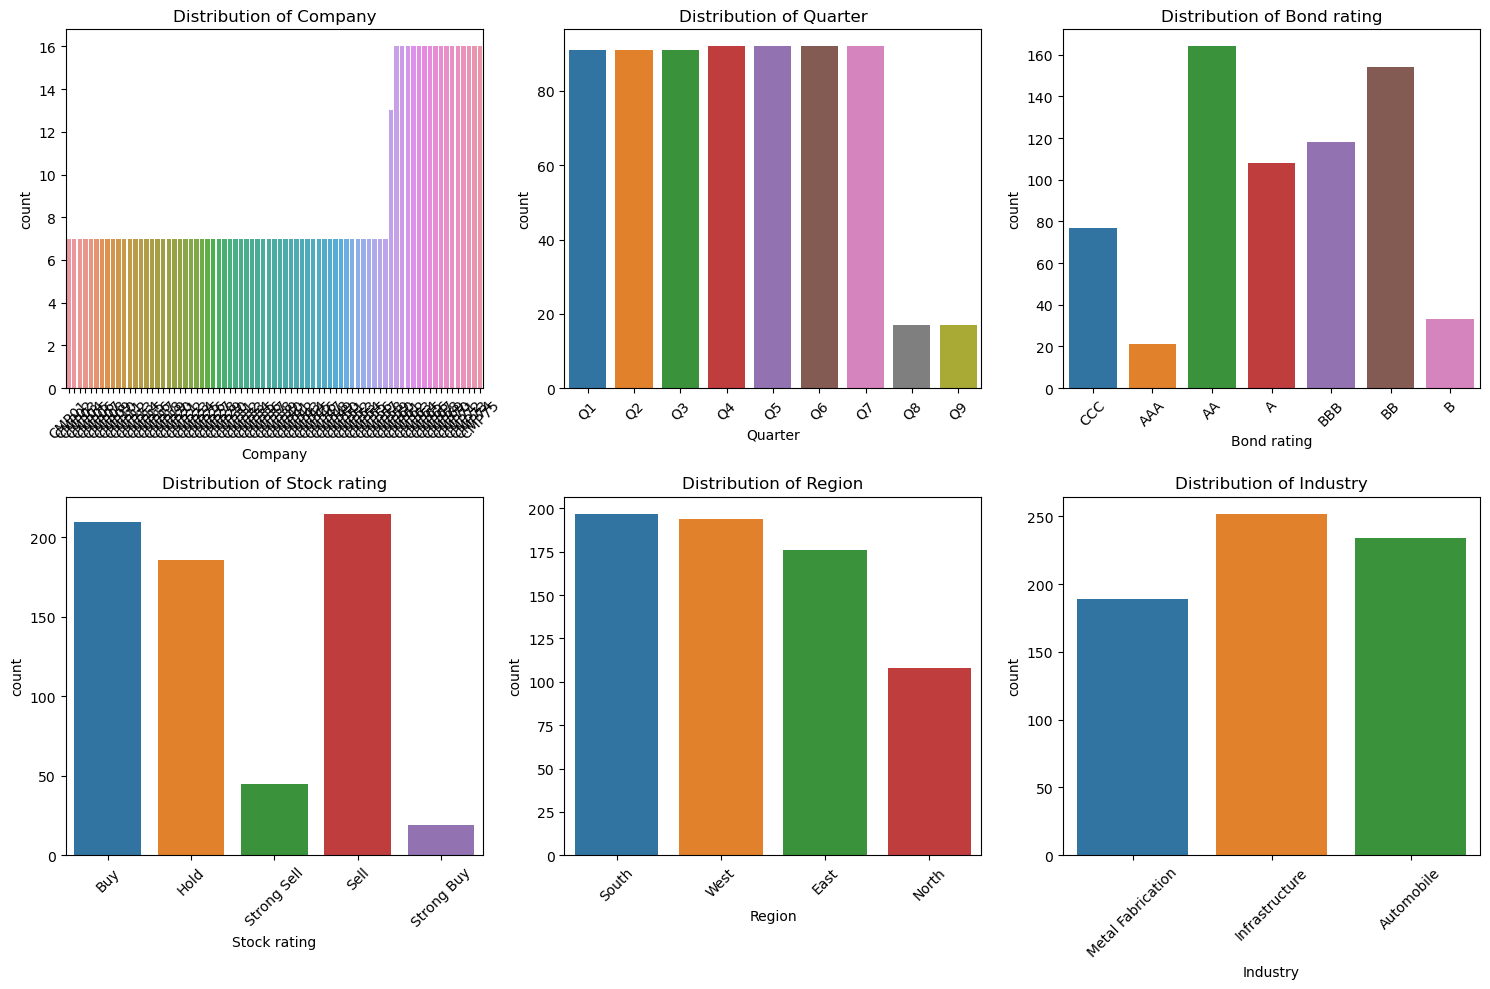

In [8]:
# Data Visualization
plt.figure(figsize=(10, 8))
sns.histplot(data=train_df, x='Sales', kde=True)
plt.title("Distribution of Sales")
plt.show()

categorical_columns = ['Company', 'Quarter', 'Bond rating', 'Stock rating', 'Region', 'Industry']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=train_df, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()



In [11]:
# Data Preprocessing
train_df = train_df.dropna(subset=['Sales'])
inventory_ratio_median = train_df['InventoryRatio'].median()
train_df['InventoryRatio'].fillna(inventory_ratio_median, inplace=True)
inventory_ratio_median_test = test_df['InventoryRatio'].median()
test_df['InventoryRatio'].fillna(inventory_ratio_median_test, inplace=True)
test_df = test_df.drop_duplicates(subset='ID', keep='first')

# Feature Engineering
train_df['Quarter_Num'] = train_df['Quarter'].str[1].astype(int)
test_df['Quarter_Num'] = test_df['Quarter'].str[1].astype(int)

month_to_quarter = {
    1: 1, 2: 1, 3: 1,
    4: 2, 5: 2, 6: 2,
    7: 3, 8: 3, 9: 3,
    10: 4, 11: 4, 12: 4,
    13: 5, 14: 5, 15: 5,
    16: 6, 17: 6, 18: 6,
    19: 7, 20: 7, 21: 7,
    22: 8, 23: 8, 24: 8,
    25: 9, 26: 9, 27: 9,
    28: 10, 29: 10, 30: 10,
}

economic_indicators_df['Quarter_Num'] = economic_indicators_df['Month'].map(month_to_quarter)
economic_indicators_df.to_csv('economic_indicators_updated.csv', index=False)

train_merged = pd.merge(train_df, economic_indicators_df, how='left', on='Quarter_Num')
test_merged = pd.merge(test_df, economic_indicators_df, how='left', on='Quarter_Num')

train_data = train_merged
test_data = test_merged

company_dummies = pd.get_dummies(train_data['Company'], prefix='Company')
train_data = pd.concat([train_data, company_dummies], axis=1)
train_data.drop('Company', axis=1, inplace=True)

bond_rating_mapping = {'AAA': 7, 'AA': 6, 'A': 5, 'BBB': 4, 'BB': 3, 'B': 2, 'CCC': 1}
train_data['Bond_rating'] = train_data['Bond rating'].map(bond_rating_mapping)
train_data.drop('Bond rating', axis=1, inplace=True)

stock_rating_mapping = {'Strong Buy': 5, 'Buy': 4, 'Hold': 3, 'Sell': 2, 'Strong Sell': 1}
train_data['Stock_rating'] = train_data['Stock rating'].map(stock_rating_mapping)
train_data.drop('Stock rating', axis=1, inplace=True)

region_dummies = pd.get_dummies(train_data['Region'], prefix='Region')
train_data = pd.concat([train_data, region_dummies], axis=1)
train_data.drop('Region', axis=1, inplace=True)

industry_dummies = pd.get_dummies(train_data['Industry'], prefix='Industry')
train_data = pd.concat([train_data, industry_dummies], axis=1)
train_data.drop('Industry', axis=1, inplace=True)

company_dummies_test = pd.get_dummies(test_data['Company'], prefix='Company')
test_data = pd.concat([test_data, company_dummies_test], axis=1)
test_data.drop('Company', axis=1, inplace=True)

test_data['Bond_rating'] = test_data['Bond rating'].map(bond_rating_mapping)
test_data.drop('Bond rating', axis=1, inplace=True)

test_data['Stock_rating'] = test_data['Stock rating'].map(stock_rating_mapping)
test_data.drop('Stock rating', axis=1, inplace=True)

region_dummies_test = pd.get_dummies(test_data['Region'], prefix='Region')
test_data = pd.concat([test_data, region_dummies_test], axis=1)
test_data.drop('Region', axis=1, inplace=True)

industry_dummies_test = pd.get_dummies(test_data['Industry'], prefix='Industry')
test_data = pd.concat([test_data, industry_dummies_test], axis=1)
test_data.drop('Industry', axis=1, inplace=True)

train_data['QuickRatio_InventoryRatio'] = train_data['QuickRatio'] / train_data['InventoryRatio']
test_data['QuickRatio_InventoryRatio'] = test_data['QuickRatio'] / test_data['InventoryRatio']

train_data['RevenueGrowth_MarketshareChange'] = train_data['RevenueGrowth'] * train_data['MarketshareChange']
test_data['RevenueGrowth_MarketshareChange'] = test_data['RevenueGrowth'] * test_data['MarketshareChange']

train_data['Year'] = train_data['Quarter_Num'].apply(lambda x: 1 if x <= 4 else (2 if x <= 8 else 3))
test_data['Year'] = test_data['Quarter_Num'].apply(lambda x: 1 if x <= 4 else (2 if x <= 8 else 3))

train_data['QuickRatio_Squared'] = train_data['QuickRatio'] ** 2
test_data['QuickRatio_Squared'] = test_data['QuickRatio'] ** 2

train_data['QuickRatio_Binned'] = pd.cut(train_data['QuickRatio'], bins=[0, 1, 2, float('inf')], labels=['Low', 'Medium', 'High'])
test_data['QuickRatio_Binned'] = pd.cut(test_data['QuickRatio'], bins=[0, 1, 2, float('inf')], labels=['Low', 'Medium', 'High'])

train_data = pd.get_dummies(train_data, columns=['QuickRatio_Binned'])
test_data = pd.get_dummies(test_data, columns=['QuickRatio_Binned'])

economic_cols = ['Consumer Sentiment', 'Interest Rate', 'PMI', 'Money Supply', 'NationalEAI', 'EastEAI', 'WestEAI', 'SouthEAI', 'NorthEAI']
train_data['Avg_Economic_Indicators'] = train_data[economic_cols].mean(axis=1)
test_data['Avg_Economic_Indicators'] = test_data[economic_cols].mean(axis=1)



In [12]:
# Model Development and Evaluation
train_data = train_data.sort_values('Month')
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42)

X_train = train_set.drop(['Sales', 'Month'], axis=1)
y_train = train_set['Sales']
X_val = val_set.drop(['Sales', 'Month'], axis=1)
y_val = val_set['Sales']

X_train_encoded = pd.get_dummies(X_train, columns=['Quarter'])
X_val_encoded = pd.get_dummies(X_val, columns=['Quarter'])

train_columns = X_train_encoded.columns
X_val_encoded = X_val_encoded.reindex(columns=train_columns, fill_value=0)

rf_model = RandomForestRegressor(n_estimators=8000, random_state=42)
rf_model.fit(X_train_encoded, y_train)

val_predictions = rf_model.predict(X_val_encoded)
val_mae = mean_absolute_error(y_val, val_predictions)
print("Validation MAE:", val_mae)



Validation MAE: 302.17845634920633


In [13]:
# Model Deployment
final_X_train = train_data.drop(['Sales', 'Month'], axis=1)
final_y_train = train_data['Sales']

final_X_train_encoded = pd.get_dummies(final_X_train, columns=['Quarter'])
final_model = RandomForestRegressor(n_estimators=8000, random_state=42)
final_model.fit(final_X_train_encoded, final_y_train)

test_data_encoded = pd.get_dummies(test_data.drop(['Month', 'ID'], axis=1), columns=['Quarter'])
train_columns = final_X_train_encoded.columns
test_data_encoded = test_data_encoded.reindex(columns=train_columns, fill_value=0)



In [14]:
test_predictions = final_model.predict(test_data_encoded)
submission_df = pd.DataFrame({'ID': test_data['ID'], 'Sales': test_predictions})
submission_df.to_csv('submission_for_sales_prediction.csv', index=False)